Lending Club Case Study by Manish Kumar & Narendhar Tangella
------------------------------------------------------------

OBJECTIVE:

Primary objective for this case study is to apply Exploratory Data Analysis (EDA) techniques to the available lending data to gain data insights to assist the Lender with understanding the driving factors that lead to loan default (Charged Off) to augument the risk asessment procedures.

EDA Techniques applied:
1) SOURCING DATA - A complete loan data set has been provided for the lending done in the years from 2007-2011. No further data sourcing is required for completing the analysis. Therefore we can ignore this.
2) DATA CLEANING - Various data cleaning techniques will be applied to ensure the quality of data is optimum for EDA.
3) UNIVARIATE ANALYSIS - This is to examine variables one at a time to understand the meta data description, data distribution and summary metrics
4) SEGMENTED UNIVARIATE ANALYSIS - This is to segment data and compares various metrics to gain further insights
5) BIVARIATE ANALYSIS - This is to compare two or more varibles to analysis correlation for continuous and extend the technique to categorical variables as well
6) DERIVED METRICS - This is to derive further insights from the available data

APPROACH:
DATA CLEANING - Clean the data using various data cleaning techniques, namely the below
FIX ROWS and COLUMNS - Remove any rows/columns that do not provide any useful or complete data
FIX MISSING VALUES:

'Set values as missing values: Identify values that indicate missing data, and yet are not recognised by the software as such, e.g treat blank strings, "NA", "XX", "999", etc. as missing.
Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to keep missing values as such rather than exaggerating the existing rows/columns.
Delete rows, columns: Rows could be deleted if the number of missing values are insignificant in number, as this would not impact the analysis. Columns could be removed if the missing values are quite significant in number.
Fill partial missing values using business judgement: Missing time zone, century, etc. These values are easily identifiable.'

STANDARDISING VALUES

INVALID VALUES

FILTERING DATA

GRAPHICAL REPRESNTATION Of ANALYSIS


In [45]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To ignore any unnecessary warnings

In [46]:
#Loading the data into a data frame loan.
loan = pd.read_csv('loan.csv')
#Print the data frame to get a gist of the data. Not using print due to formatting issues
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Find out the total number Rows and Columns in the loan data frame.
loan.shape

(39717, 111)

In [48]:
#Print concise summary of a dataframe.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [49]:
#Generate descriptive statistics for qunatitative variables
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


We can conclude from above outputs that there are 111 columns, 39717 rows. 

We will use the following methods to complete our analysis.

DATA SOURCING -- Since we have data, no further time is spent on sourcing data.

DATA CLEANING -- Clean the data before carrying out any analysis

UNIVARIATE ANALYSIS -- Analyse single column for insights/to derive metrics

SEGMENTED UNIVARIATE ANALYSIS -- Break the data of single column into group to get additional insights

BIVARIATE/MULTIVARIATE -- Analyse more then one column to understand the relationships i.e if one columns influences the other

DERIVED METRICS -- Finally focus on deriving additional metrics for additional insights

DATA CLEANING - CLEAN THE DATA i.e DELETE UNNECESSARY ROWS AND COLUMNS
1. Fix the Rows and Colums
2. Fix Missing Values
3. Standardise Values
4. Fix Invalid values
5. Filter Data

FIX THE ROWS
1) Delete any unnecessary header/footer rows
2) Delete any total/subtotal rows
3) Delete extra rows such as column number indictor rows/blank ones

FIX THE COLUMNS
1) Delete unnecessary columns such as columns with excessive null values
2) Merge columns to create unique identifiers
3) Split columns

IDENTIFY THE QUALITY OF DATA

FIX THE ROWS:
No evidence of unnecessary header, footer, total, sub-total or rows with all null values

In [57]:
#Check for any rows with all null values and delete them if there are any
loan[loan.isnull().all(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


FIX THE COLUMNS:

In [59]:
#Identify the percentage of null values for each column 
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [60]:
#From above data, we can identify that many columns have 100% null values which do not add value
#Calculate null value percentage for each column and identify the columns that have more than 50% null values
loan_null_val_perc = round( ( loan.isnull().sum() / len(loan.member_id) ) * 100, 2)
loan_null_val_perc[ loan_null_val_perc > 50 ]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [61]:
#Calculating the percentage of columns with more than 50% null values to be dropped
loan_null_val_perc[ loan_null_val_perc > 50 ].count() / loan.shape[1]

0.5135135135135135

In [62]:
#Delete Columns with Null Values as they do not add any value to the analysis.
#Drop the columns if all data in the respective column is null
loan.dropna(axis=1, how='all', inplace=True)

In [63]:
#Check the shape of the Data Frame Loan after dropping all columns with 100% null values
loan.shape

(39717, 57)

In [64]:
#Lets examine all the columns with more than 50% null values to decide whether to delete them or retain for further analysis
loan_null_val_perc = round( ( loan.isnull().sum() / len(loan.member_id) ) * 100, 2 )
print('Colums with Null Values greater than 50% :\n', loan_null_val_perc[ loan_null_val_perc > 50 ],'\n')
print('Columns with Null Values above 25% and below 50% :\n', loan_null_val_perc[ (loan_null_val_perc > 25) & (loan_null_val_perc < 50) ])

Colums with Null Values greater than 50% :
 mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64 

Columns with Null Values above 25% and below 50% :
 desc    32.59
dtype: float64


Columns below have significant(>50%) null values. Lets examine if they are required for analysis.

next_pymnt_d - 'Next scheduled payment date' - This has no bearing on the loan default and therefore the column can be deleted due to high percentage 
of missing values.

mths_since_last_record - 'The number of months since the last public record.' - This indicates how long the loan applicant's 
public record has been inactive and indicates whether they are financially active but doesn't help with our analysis.

mths_since_last_delinq - This is a post deliquent status but doesn't add lot of value to our analysis with significant missing values

desc - 'Loan description provided by the borrower' - This is unordered categorical variable. Although it might help to understand the customer's
detailed reason behind applying loan, we cannot use this for analysis and we could rely on Title and purpose columns instead. 

DROP the columns for reasons explained above

In [66]:
#Dropping the unnecessary columns
loan.drop( ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc'], axis=1, inplace=True)

In [67]:
#Print concise summary of a dataframe after deleting columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [68]:
#Identify the columns with single values.
single_value_columns = [col for col in loan.columns if loan[col].nunique() == 1]
print(single_value_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


Lets examine the columns with single values to identify if there is an issue with data collection.

pymt_plan - Indicates if a payment plan has been put in place for the loan

initial_list_status - Indicates if the loan is wholly funded (W) or fractional (F)

collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections

policy_code - "publicly available policy_code=1, new products not publicly available policy_code=2"

application_type - Indicates wheter the application is a Single/Joint 

acc_now_delinq - number of accounts the borrower is delinquent on

chargeoff_within_12_mths - indicates whether the loan has been 'Charged Off' in the last 12 months

delinq_amnt - amount that is past due

tax_liens - indicates whether there are any legal claims by government entity on borrower's property 

In [70]:
#Print the unique values to understand if the data is missing or for understanding data characteristics
[ print(col,":",loan[col].unique()) for col in single_value_columns ]

pymnt_plan : ['n']
initial_list_status : ['f']
collections_12_mths_ex_med : [ 0. nan]
policy_code : [1]
application_type : ['INDIVIDUAL']
acc_now_delinq : [0]
chargeoff_within_12_mths : [ 0. nan]
delinq_amnt : [0]
tax_liens : [ 0. nan]


[None, None, None, None, None, None, None, None, None]

Above columns can be safely deleted as either there is:

a data collection issue for some columns, for example delinq_amnt OR

no variation in the status for columns application_type/pymnt_plan/initial_list_status

DELETING THE ABOVE COLUMNS should not negatively impact our analysis

In [72]:
#Drop all the single value columns
loan.drop(single_value_columns, axis = 1, inplace = True)

In [73]:
#Print concise summary of a dataframe after deleting columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Lets examine other columns url, member_id, id

url - This is a LC url page for each loan application

id - A unique id assigned by LC for identify the loan

member_id - a unique id assigned by LC for each borrower

Above variables can be deleted as they do not assist with analysis to find any useful insights.

In [75]:
#Drop the columns that are not required as detailed above
loan.drop( ['url','member_id','id'], axis = 1, inplace = True )

In [76]:
#Now we are left with 41 columns
loan.shape

(39717, 41)

In [77]:
#Delete zip code as the data is incomplete due to 'xx' values. 
#we could rely on state if we would like to find any association between a state and loan default
loan.zip_code

0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
39712    802xx
39713    274xx
39714    017xx
39715    208xx
39716    027xx
Name: zip_code, Length: 39717, dtype: object

In [78]:
#Identify if we can delete out_prncp (Outstanding Principal)
loan.groupby('loan_status') [ ['out_prncp','out_prncp_inv'] ].median()
#Outstanding principal amounts for 'Charged Off' customers could have been a useful metric to calculate the size of the default amount.
#However since the metric is not available for status we are interested in, we can delete the columns

,out_prncp,out_prncp_inv
loan_status,,
Charged Off,0.000,0.00
Current,1521.025,1500.78
Fully Paid,0.000,0.00


In [79]:
#Drop the columns zip_code, out_prncp, out_prncp_inv
loan = loan.drop( ['zip_code', 'out_prncp', 'out_prncp_inv'], axis = 1 )

In [80]:
#Identify the remaining column count
loan.shape

(39717, 38)

In [81]:
#analyse columns total_rec_late_fee and collection_recovery_fee, recoveries to see if they are relevant
loan.groupby('loan_status')[ ['total_rec_late_fee','collection_recovery_fee','recoveries'] ].mean()
#Whilst they are usefull indicators to predict which current loans could be delinquent in future, it is not useful for 'Charged Off' loans
#Mean statistics do not indicate significant influence on defaults. Therefore we can drop the columns

,total_rec_late_fee,collection_recovery_fee,recoveries
loan_status,,,
Charged Off,4.291692,87.56594,672.101872
Current,1.172878,0.00000,0.000000
Fully Paid,0.869452,0.00000,0.000000


In [82]:
loan = loan.drop( ['total_rec_late_fee','collection_recovery_fee','recoveries'], axis = 1 )

In [83]:
#We have to 35 columns now
loan.shape

(39717, 35)

In [84]:
#examing the title and purpose columns
print( 'Title grouping rows: ', loan.title.value_counts().shape )
print( 'Purpose grouping rows:', loan.purpose.value_counts().shape )

Title grouping rows:  (19615,)
Purpose grouping rows: (14,)


In [85]:
# purpose variable has better categories that could be useful for our analysis. We could drop the title
loan = loan.drop( 'title', axis = 1 )

In [86]:
#Drop consumer behaviour variabes that do not contribute to the analysis
loan = loan.drop( ['delinq_2yrs', 'earliest_cr_line','inq_last_6mths','open_acc','revol_bal','revol_util', \
                  'last_pymnt_d','last_pymnt_amnt','total_acc','last_credit_pull_d','emp_title'], axis = 1 )

In [87]:
#Check the renaming columns count
loan.shape

(39717, 23)

In [88]:
#Check the remaining columns
loan.columns
#We could work with 23 columns for Data Analysis

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'pub_rec_bankruptcies'],
      dtype='object')

In [89]:
#Check the data types of each column
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
total_rec_int           float64
pub_rec_bankruptcies    float64
dtype: object

RESULTS OF DATA CLEANING
-------------------------

1) There are no header/footer/Total/Sub-total count/null value rows
2) There are many columns with greater than 60% null values which are dropped as they do not contribute to the analysis
3) Columns which are not relevant to this analysis are also dropped

STANDARDISE THE DATA

In [92]:
#Convert the issue_d to correct data type i.e to datetime
loan['issue_d'] = pd.to_datetime( loan['issue_d'], format = '%b-%y' )


In [93]:
#Check the interest rate
loan.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [94]:
#Apply the map function on the int_rate to convert to float value by stripping the % charcter
loan['int_rate'] = loan.int_rate.map( lambda x:float( x.strip('%') ) )

In [95]:
#Checking if there are any duplicate values in the rows
loan[loan.duplicated()]
#NO DUPLICATE ROWS FOUND

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,pub_rec,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies


OUTCOME OF STANDARDISING DATA
-----------------------------
1) We have converted the datatypes to the required type
2) NO duplicated rows found

UNIVARIATE / SEGMENTED UNIVARIATE ANALYSIS

Detailed analysis will be carried out on individual variables and data will be cleaned/filtered wherever required based on the insights

In [98]:
#Define a reusable function to draw box plots

def create_count_plot(df, column, title=None, xlabel=None, ylabel='Count', palette='muted', figsize=(10, 6), rotation=0):
    """ 
    Creates a seaborn count plot for a specified column in a data frame

    Parameters: 
    df: Data Frame that contains data
    column: column name from data frame that you wish to plot
    title: Title of the plot. Defaults to None
    xlabel: Label for X-axis. Defaults to None
    ylabel: Label for Y-axis. Default to 'Count'
    palette: Colour palette for the plot. Default is 'muted'
    figsize: Figure size. Default (10,6)
    rotation: Rotation angle for x-axis. Default is 0
    """
    #Set Figure Size
    plt.figure(figsize = figsize)
    ax = sns.countplot(x=column, data=df, palette=palette, order=df[column].value_counts().index )
    #Set title if its provided
    if title:
        plt.title(title, fontsize=14, fontweight='bold')

    if xlabel:
        plt.xlabel(xlabel, fontsize=12)

    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=12, rotation=rotation)
    plt.yticks(fontsize=12)

    #show plot
    plt.tight_layout()
    plt.show()


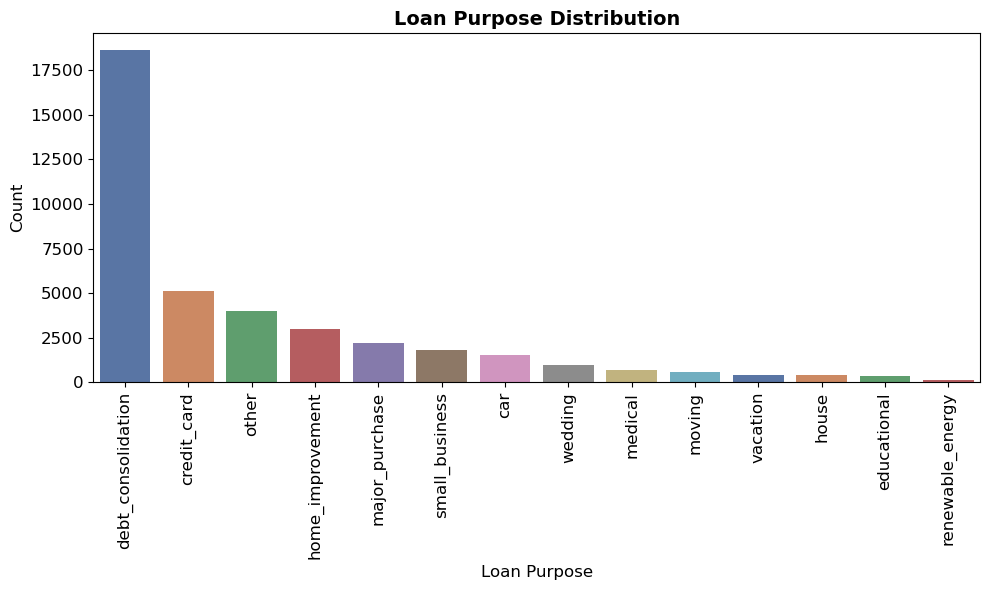

In [99]:
#Check the distribution of Loans based on the purpose
create_count_plot( loan, 'purpose', 'Loan Purpose Distribution', 'Loan Purpose', palette='deep', rotation=90 )

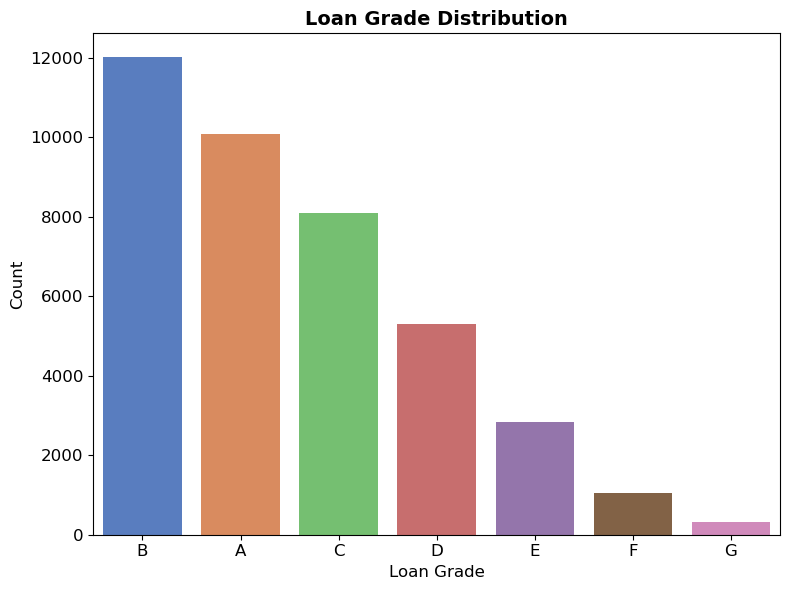

In [100]:
#Check the distribution of Loan Grades
create_count_plot( loan, 'grade', 'Loan Grade Distribution', 'Loan Grade', figsize=(8,6) )

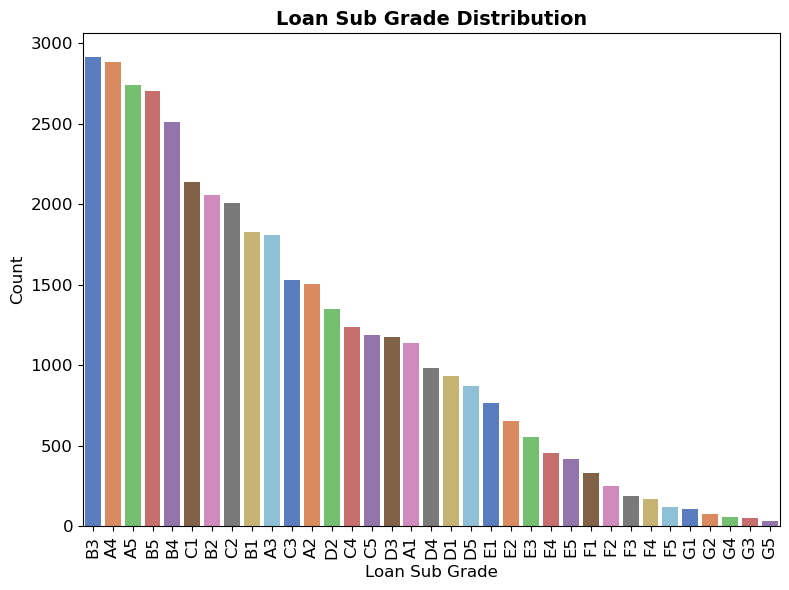

In [101]:
create_count_plot( loan, 'sub_grade', 'Loan Sub Grade Distribution', 'Loan Sub Grade', figsize=(8,6), rotation=90 )

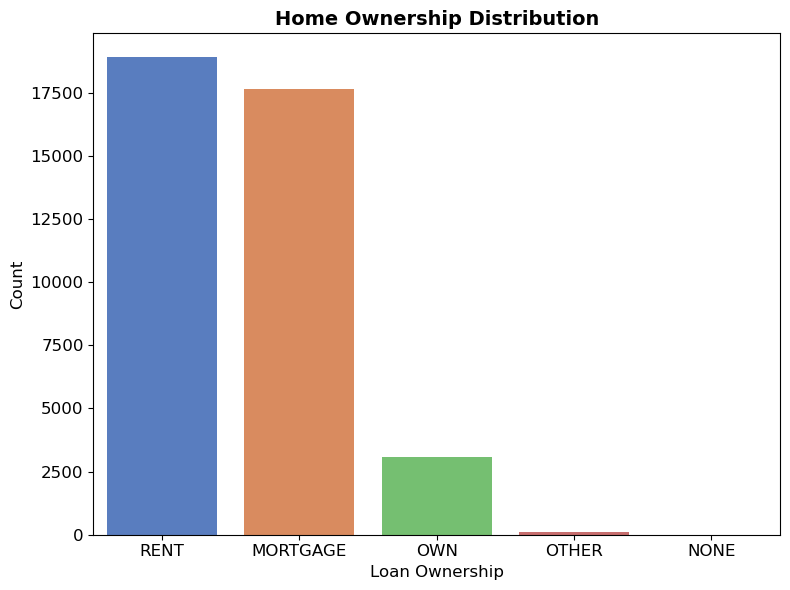

In [102]:
#Check the distribution of homeownership
create_count_plot( loan, 'home_ownership', 'Home Ownership Distribution', 'Loan Ownership', figsize=(8,6) )

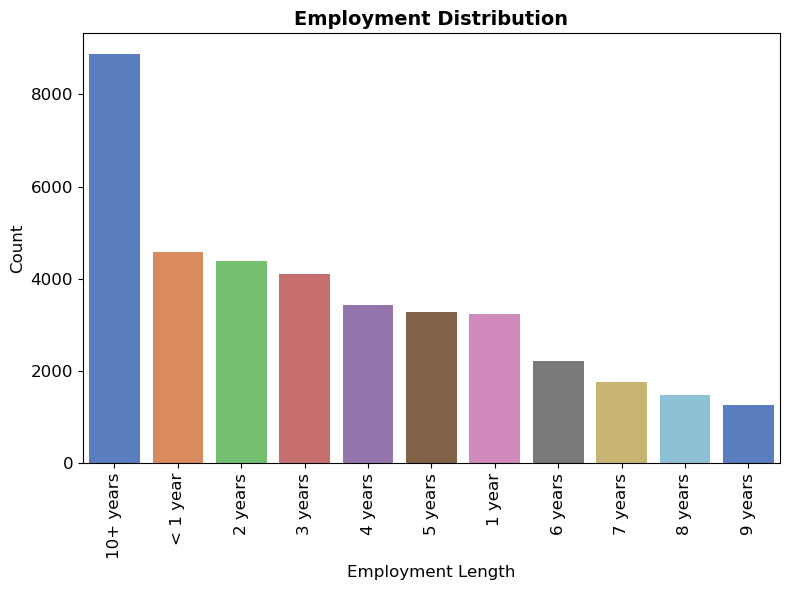

In [103]:
#Employment Length Distribution Plot
create_count_plot( loan, 'emp_length', 'Employment Distribution', 'Employment Length', figsize=(8,6), rotation=90)

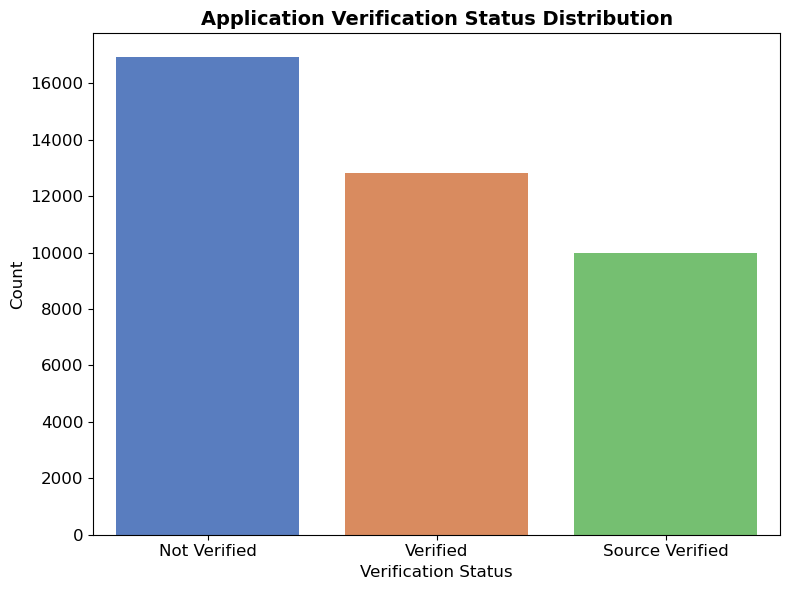

In [104]:
#Verification Status Distribution
create_count_plot( loan, 'verification_status', 'Application Verification Status Distribution', 'Verification Status', figsize=(8,6) )

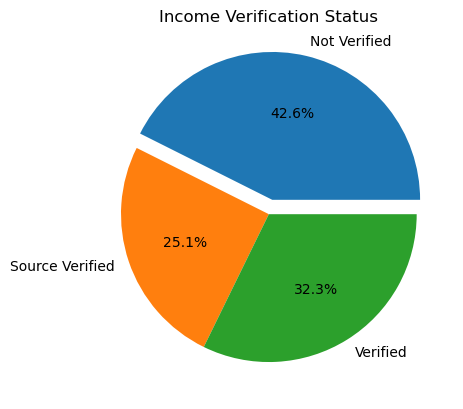

In [105]:
#Lets Check Verification Status column and draw a pie chart to get percentages

loan_status_groupby = loan.groupby('verification_status')['verification_status'].count()
category = ['Not Verified', 'Verified', 'Source Verified']
category.sort()
explode = [0.1, 0, 0]
plt.pie( loan.groupby('verification_status')['verification_status'].count(), labels = category, autopct = '%1.1f%%', explode = explode )
plt.title( 'Income Verification Status', fontdict = { 'horizontalalignment' : 'center' } )
plt.show()

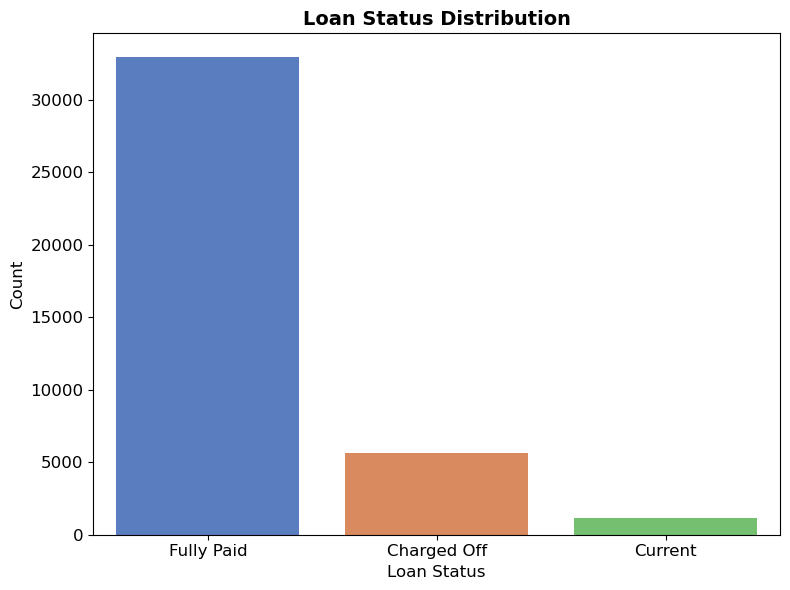

In [106]:
#Loan Status Distribution Plot
create_count_plot(loan, 'loan_status', 'Loan Status Distribution', 'Loan Status', figsize=(8,6))

In [107]:
#Lets examine the loan category
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


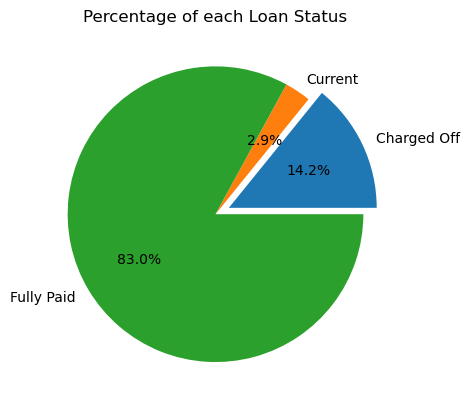

In [108]:
#Show the percentage of each loan status and highlight Charged Off Loans

loan_status_groupby = loan.groupby('loan_status')['loan_status'].count()
category = ['Fully Paid', 'Charged Off', 'Current']
category.sort()
explode = [0.1, 0, 0]
plt.pie(loan.groupby('loan_status')['loan_status'].count(), labels = category, autopct = '%1.1f%%', explode = explode)
plt.title('Percentage of each Loan Status')
plt.show()

In [109]:
# 'Current' loan status is of no interest to this analysis. Therefore filter the data

loan = loan [ loan.loan_status != 'Current']

In [110]:
#Lets examine the null values
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec                    0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
pub_rec_bankruptcies     697
dtype: int64

In [111]:
#Employment Length is of interst for this analysis. Address the null values
loan.emp_length.value_counts()
#We need to convert the string values to digits  for our analysis

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [112]:
#Use the string extract function for extracting digits including floating-point numbers
# < 1 years experience is counted as 1 Years of experience
loan['emp_length'] = loan["emp_length"].str.extract( "(\d*\.?\d+)", expand = True )

In [113]:
#Calculate the mode of emp_length and replace the null values with mode
print( 'Mode of Employment Length: ', loan.emp_length.mode() )
#Fill the nullvalues with mode 
loan["emp_length"].fillna(10, inplace = True)

Mode of Employment Length:  0    10
Name: emp_length, dtype: object


In [114]:
#convert the emp_length to integer data type
loan['emp_length'] = loan["emp_length"].astype(int)

In [115]:
#Lets check the datypes of each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  int32         
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

pub_rec_bankruptcies is the only column that has some missing values. However it is best to leave those values as null rather than
impute with mode/median as it skew the analysis. I dont see any impact on loan default.


In [117]:
#Define a resuable function to draw histogram for continuous variables
def create_histplot( df, column, title=None, xlabel=None, ylabel='Frequency', bins=15, kde=True, palette='muted', figsize=(8, 4) ):
    """
    Creates a seaborn hist plot for a specified column in a data frame

    Parameters: 
    df: Data Frame that contains data
    column: column name from data frame that you wish to plot
    title: Title of the plot. Defaults to None
    xlabel: Label for X-axis. Defaults to None
    ylabel: Label for Y-axis. Default to 'Frequency'
    bins: number of bins. Default is '15'
    kde: includes a kde line
    color: Colour of the histogram. Default is skyblue
    figsize: Figure size. Default (10,6)
    rotation: Rotation angle for x-axis. Default is 0
    """
    #Set Figure Size
    plt.figure(figsize = figsize)
    #sns.set_palette("muted")
    ax = sns.histplot(df[column], bins=bins, kde=kde, palette=palette )
    #Set title if its provided
    if title:
        plt.title(title, fontsize=14, fontweight='bold')

    if xlabel:
        plt.xlabel(xlabel, fontsize=12)

    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=12 )
    plt.yticks(fontsize=12 )

    #show plot
    plt.tight_layout()
    plt.show()


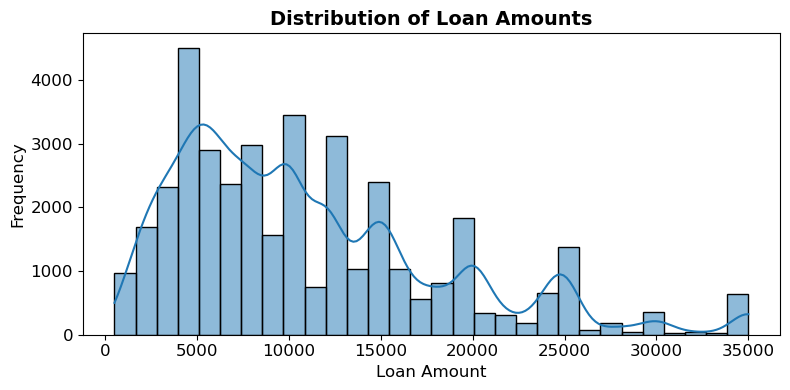

In [118]:
#Create a distribution plot for Loan Amounts
create_histplot(loan, 'loan_amnt', title='Distribution of Loan Amounts', bins=30, xlabel='Loan Amount', figsize=(8,4) )

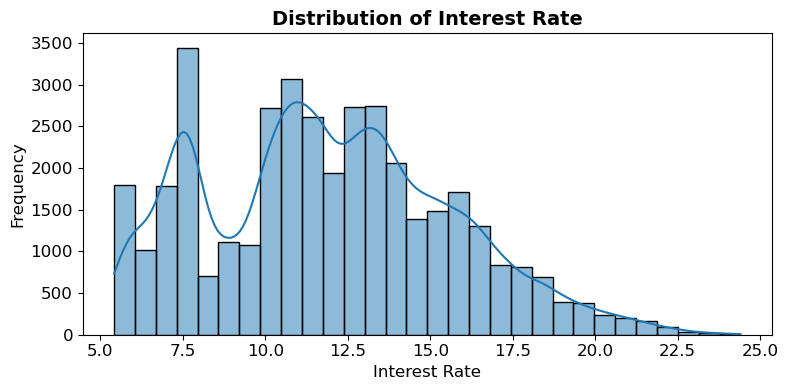

In [119]:
#Create a plot for Distribution of Interest Rates
create_histplot(loan, 'int_rate', title='Distribution of Interest Rate', bins=30, xlabel='Interest Rate', figsize=(8,4) )

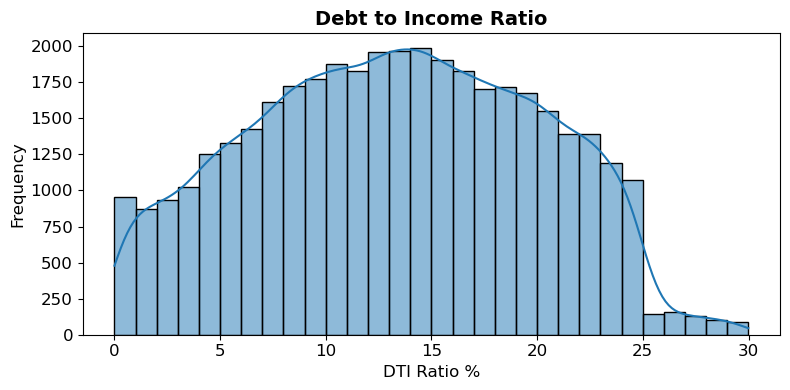

In [120]:
#Create a plot for Distribution of Debt to Income Ratio
create_histplot(loan, 'dti', title='Debt to Income Ratio', bins=30, xlabel='DTI Ratio %', figsize=(8,4) )

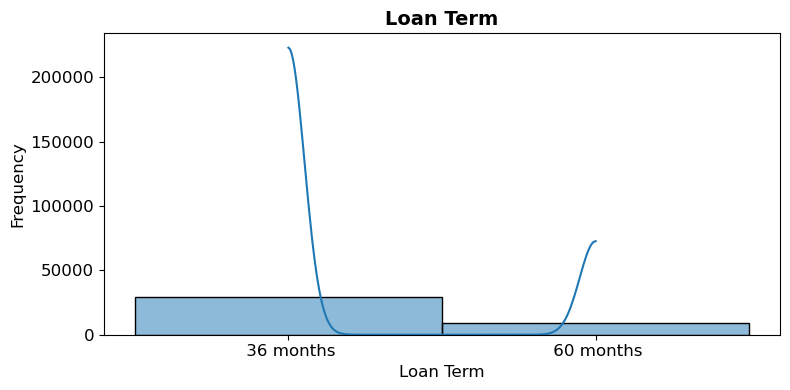

In [121]:
#Create a plot for Loan Term
create_histplot(loan, 'term', title='Loan Term', bins=10, xlabel='Loan Term', figsize=(8,4))

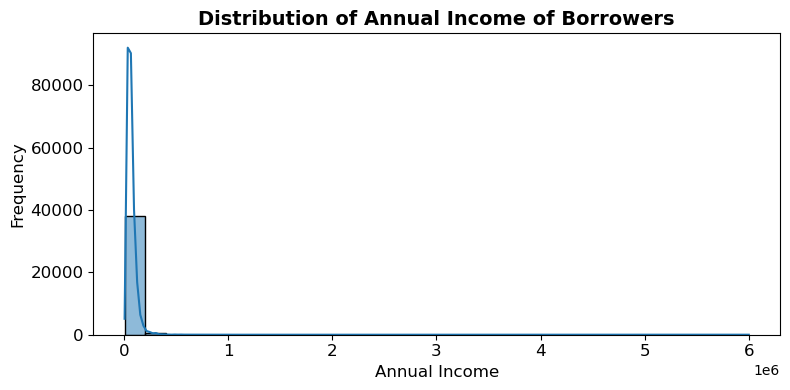

In [122]:
#Create a plot for Distribution of Annaul Income
create_histplot(loan, 'annual_inc', title='Distribution of Annual Income of Borrowers', bins=30, xlabel='Annual Income' )

THERE MIGHT BE OUTLIERS in Annual Income which needs further examination and perform outlier analysis and correction

In [124]:
#Define a reusable function for drawing box plots
def create_boxplot( df, column, title=None, ylabel=None ):
    sns.boxplot( y=column, data=df)
    if title:
        plt.title(title, fontsize=14, fontweight='bold' )
        
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.show()
    

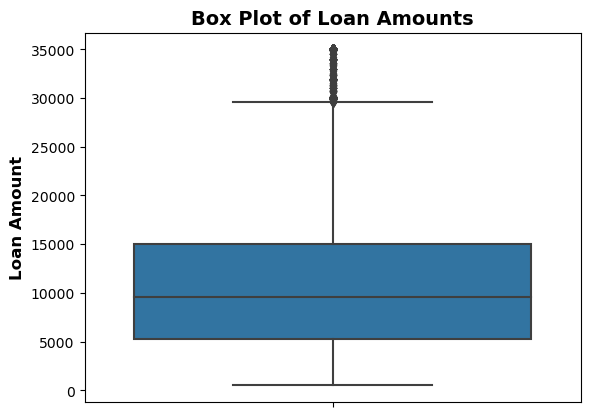

In [125]:
#Create a Box plot to check for outliers in Loan Amounts
create_boxplot(loan,'loan_amnt', title='Box Plot of Loan Amounts', ylabel='Loan Amount')

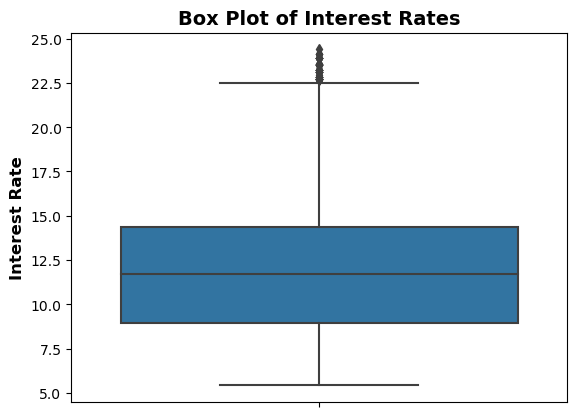

In [126]:
#Outlier checks for Interest Rates
create_boxplot(loan,'int_rate', title='Box Plot of Interest Rates', ylabel='Interest Rate')


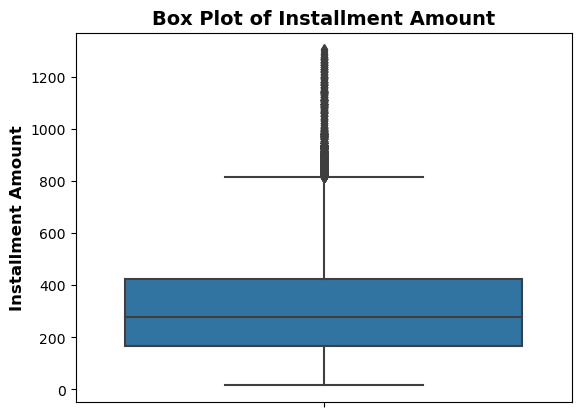

In [127]:
#Check for outliers in Installment Amount
create_boxplot(loan,'installment', title='Box Plot of Installment Amount', ylabel='Installment Amount')

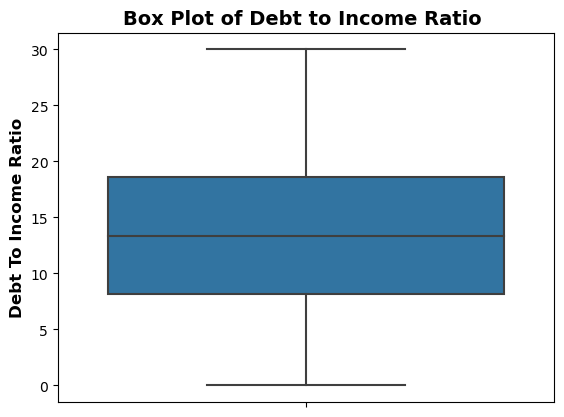

In [128]:
#Check for outliers in Debt to Income Ratio
create_boxplot(loan,'dti', title='Box Plot of Debt to Income Ratio ', ylabel='Debt To Income Ratio')

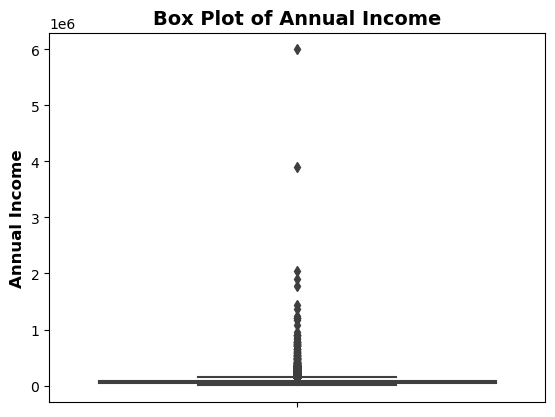

In [129]:
#Check for outliers in Annual Income
create_boxplot(loan,'annual_inc', title='Box Plot of Annual Income', ylabel='Annual Income')

OUTCOME OF OUTLIER ANALYSIS

Annual Income has outliers and may need to remove them for better analysis outcomes

In [131]:
# Lets check annaul income statistics
loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [132]:
loan.annual_inc.max()

6000000.0

In [133]:
#Calcualate interquartile range for outlier treatment

iqr_threshold = (( loan.annual_inc.quantile( 0.75 ) - loan.annual_inc.quantile( 0.25 ) ) * 1.5 ) + loan.annual_inc.quantile( 0.75 )
print( iqr_threshold )

145000.0


In [134]:
loan.annual_inc.quantile( 0.95 )

140004.0

In [285]:
#Check for Annual income more than 150000
loan[ loan.annual_inc > 145000 ]['annual_inc']

71       150000.0
77       150000.0
163      225000.0
177      168000.0
285      150000.0
           ...   
38464    150000.0
38473    200000.0
38476    180000.0
38477    180000.0
38485    200000.0
Name: annual_inc, Length: 1672, dtype: float64

In [289]:
loan[ (loan.annual_inc > 145000) & (loan.loan_status == 'Charged Off') ].shape

(0, 27)

In [137]:
loan.annual_inc.quantile( 0.99 )

234143.99999999878

In [138]:
#Given the wide distribution of the data, I felt it is best to remove extreme amounts such as above 400000 instead of using IQR/95% percentile

loan = loan[ loan['annual_inc'] <= 400000 ] #loan.annual_inc.quantile( 0.95 ) ]

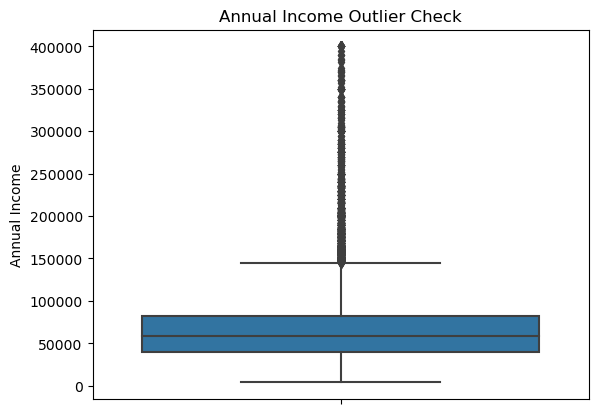

In [139]:
#Check for outliers within Annual Income after outliers treatment

sns.boxplot( y = loan['annual_inc'] )
plt.title( 'Annual Income Outlier Check' )
plt.ylabel( 'Annual Income' )
plt.show()

#Data distribution is now looking better

OUTCOME OF UNIVARIATE ANALYSIS
------------------------------

1) Debt_Consolidation is the primary reason for maximum number of loans issued

2) Loans of Grade B,A,C,D are the highest in the given order

3) Majority of the Lending Club customers either RENT or have Mortgage

4) Majority of the customers have 10+ Years of employment

5) Income source for majority of the applications (43.3%) has not been verified.

6) 14.2% of the loans are Charged Off

7) Bulk of the loans have loan amount between 1000 and 16000

8) Interest rates for the loans issued are between 5 and 25% percent

9) Debt to Income ratio is between 0 and 30%

10) Loan term is either 36/60 months

11) There are outliers in the data provided for Annaul income of borrowers

Outliers treatment:
-------------------

We have found that annaul income is spread wide. So IQR*1.5 formula or using above 95% to remove outliers may lead to significant data loss for analysis.

After examing the data, we have decided to remove any records with annaul income above 400000.

In [141]:
loan.annual_inc.describe()

count     38487.000000
mean      67032.540256
std       40271.401225
min        4000.000000
25%       40000.000000
50%       58560.000000
75%       82000.000000
max      400000.000000
Name: annual_inc, dtype: float64

In [142]:
#Lets do some binning for segmented analysis
#Bin annual income
loan.annual_inc
def binning_annual_income(x):
    if x < 27000 :
        return 'Very Low'
    elif x > 27000 and x <= 40000 :
        return 'Low'
    elif x > 40000 and x <= 80000 :
        return 'Medium'
    elif x > 80000 and x <= 100000 :
        return 'High'
    else :
        return 'Very High'

In [143]:
loan['annual_inc_cat'] = loan.annual_inc.apply( lambda x: binning_annual_income(x) )

In [144]:
#sns.barplot(x='annual_inc_cat', y='loan_status', data=loan)

UNIVARIATE / SEGMENTED UNIVARIATE ANALYSIS OUTCOMES


BIVARIATE ANALYSIS


In [147]:
#Create new columns to capture Year and Month of Loan Issued Date
loan['issue_year'] = loan['issue_d'].apply(lambda x:x.year)
loan['issue_month'] = loan['issue_d'].apply(lambda x:x.month)

In [148]:
#Convert the loan term to numerical values for further analysis

loan['term'] = loan.term.map(lambda x: int(x[0:2]))

In [149]:
loan.term.info()

<class 'pandas.core.series.Series'>
Index: 38487 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
38487 non-null  int64
dtypes: int64(1)
memory usage: 601.4 KB


In [150]:
#Define a resuable function for box plots
def create_boxplot(df, xcolumn, ycolumn, title=None, xlabel=None, ylabel=None) :
    #Set the figure size
    plt.figure( figsize=(6,4) )
    sns.boxplot(x=xcolumn, y=ycolumn, data=loan, palette='Set2')
    if title:
        plt.title(title, fontsize=14, fontweight='bold' )
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)
    plt.show()

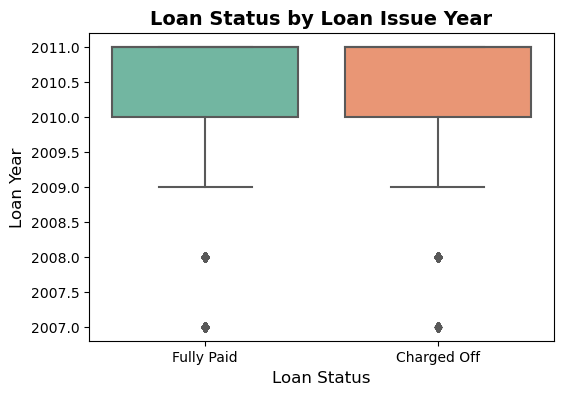

In [151]:
#Showing Box plot comparing Loan Status to the Year Issued
create_boxplot(loan, 'loan_status', 'issue_year', title='Loan Status by Loan Issue Year', xlabel='Loan Status', ylabel='Loan Year')

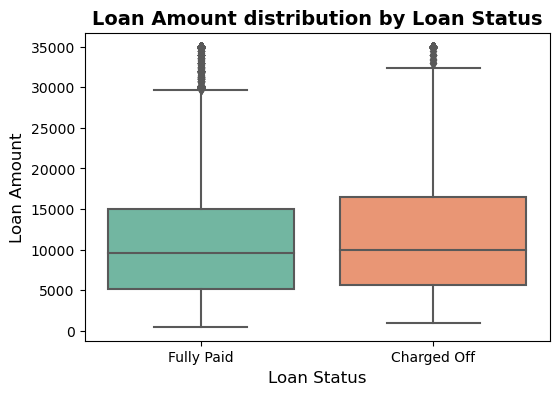

In [152]:
#Showing Box plot comparing Loan Status to the Year Issued
create_boxplot(loan, 'loan_status', 'loan_amnt', title='Loan Amount distribution by Loan Status', xlabel='Loan Status', ylabel='Loan Amount')

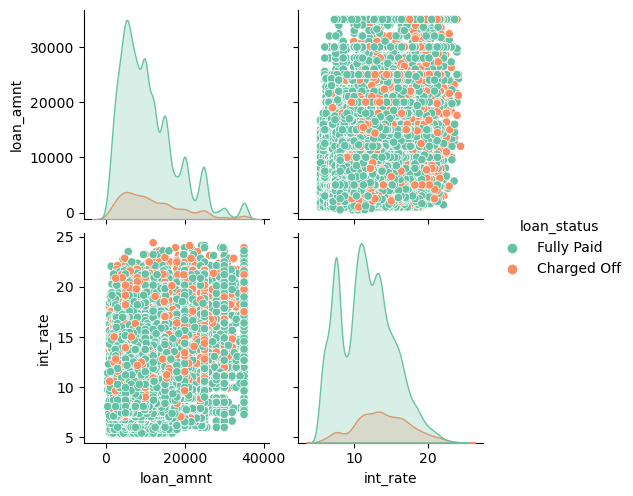

In [153]:
#Pair plots for bivariate analysis
sns.pairplot(loan[ ['loan_amnt','int_rate','loan_status'] ], hue='loan_status', palette='Set2')

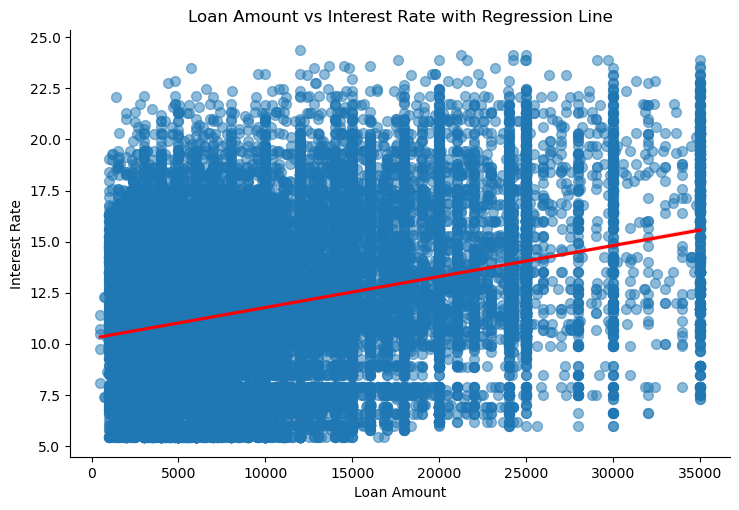

In [154]:
# Create a scatter plot with regression line using lmplot
sns.lmplot(x='loan_amnt', y='int_rate', data=loan, aspect=1.5, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "red"})
plt.title('Loan Amount vs Interest Rate with Regression Line')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


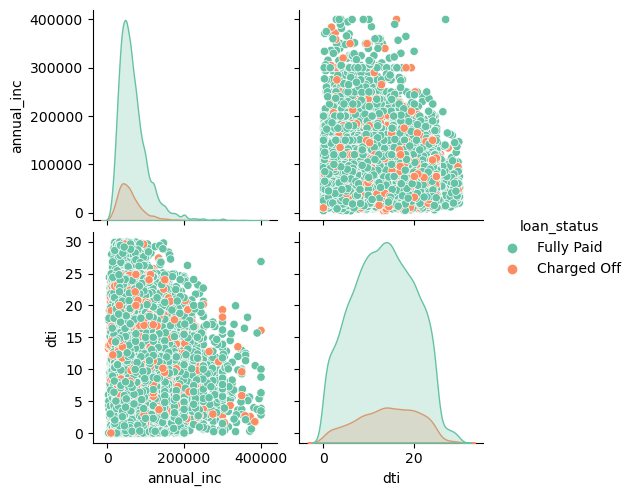

In [155]:
#Pair plot for Annual Income, Debt to Income Ratio and Loan Status
sns.pairplot(loan[ ['annual_inc','dti','loan_status'] ], hue='loan_status', palette='Set2')

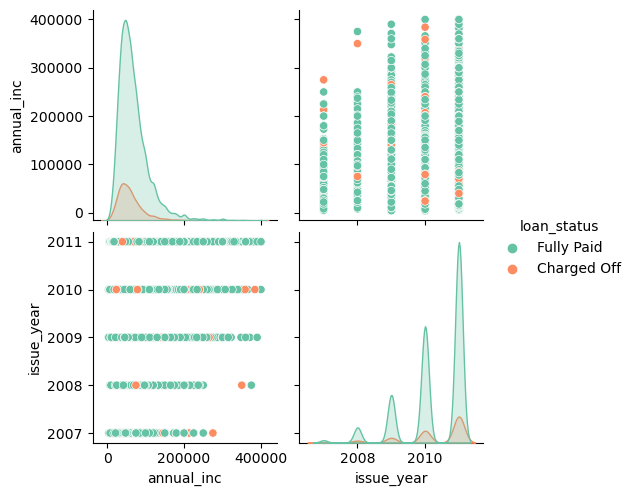

In [156]:
#Pair plot for Annual Income, Issue Year and Loan Status
sns.pairplot(loan[ ['annual_inc','issue_year','loan_status'] ], hue='loan_status', palette='Set2')

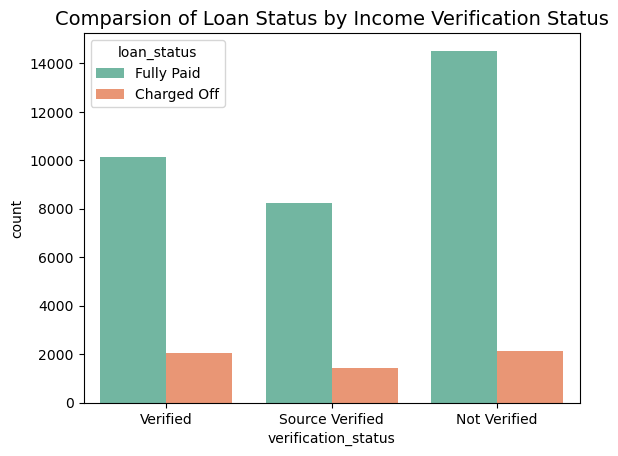

In [157]:
#Comparision of Loan Status by Income Verification Status
sns.countplot(x='verification_status', hue='loan_status', data=loan, palette='Set2')
plt.title('Comparsion of Loan Status by Income Verification Status', fontsize=14)
plt.show()

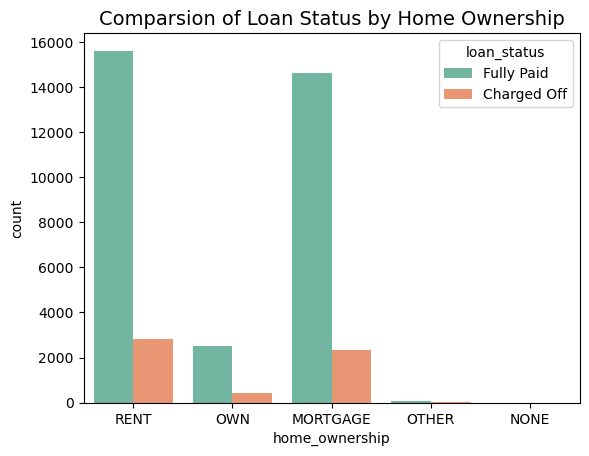

In [158]:
#Compare Home ownership for each Loan Status
sns.countplot(x='home_ownership', hue='loan_status', data=loan, palette='Set2')
plt.title('Comparsion of Loan Status by Home Ownership', fontsize=14)
plt.show()

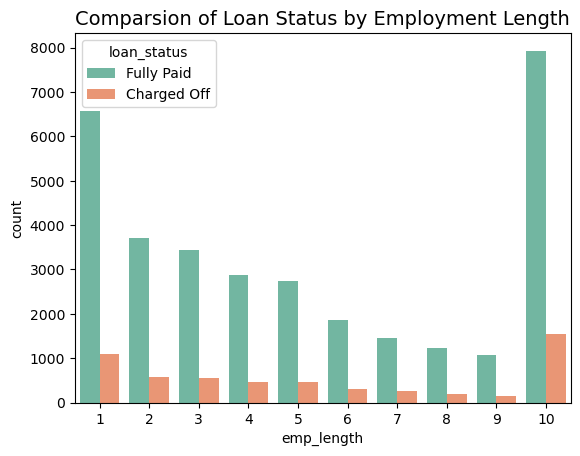

In [159]:
#Compare Home ownership for each Loan Status
sns.countplot(x='emp_length', hue='loan_status', data=loan, palette='Set2')
plt.title('Comparsion of Loan Status by Employment Length', fontsize=14)
plt.show()

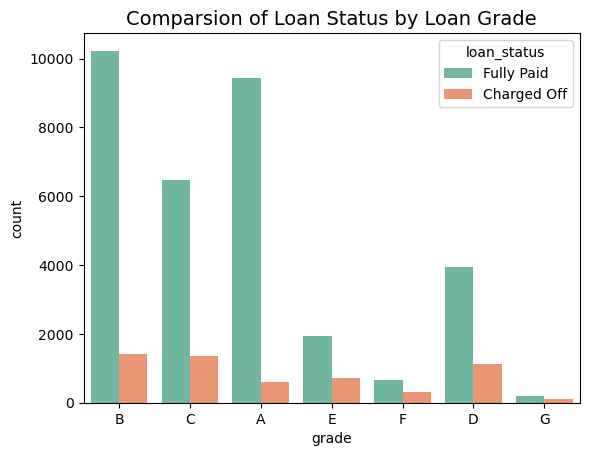

In [160]:
#Compare Loan Grades for each Loan Status
sns.countplot(x='grade', hue='loan_status', data=loan, palette='Set2')
plt.title('Comparsion of Loan Status by Loan Grade', fontsize=14)
plt.show()

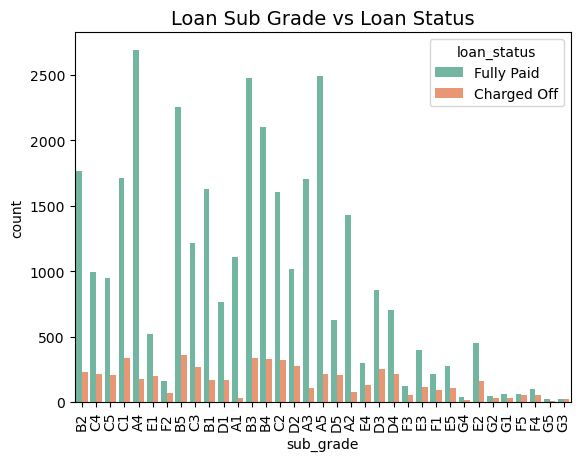

In [161]:
sns.countplot(x='sub_grade', hue='loan_status', data=loan, palette='Set2')
plt.title('Loan Sub Grade vs Loan Status', fontsize=14)
plt.xticks(rotation=90)
plt.show()

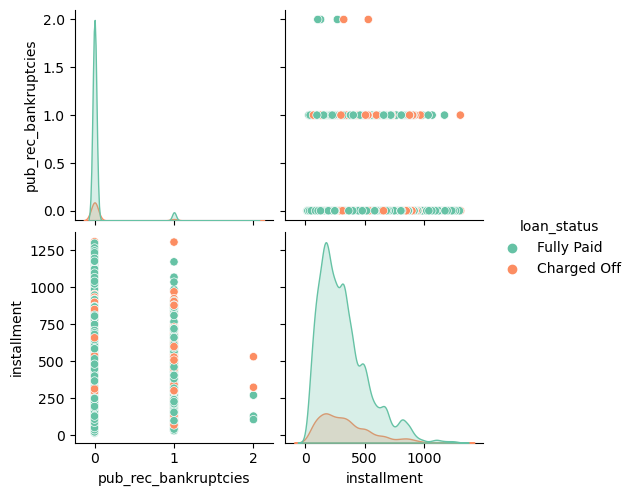

In [162]:
#Pair plot for Public Record of Bankrupticirs, Installment and Loan Status
sns.pairplot(loan[ ['pub_rec_bankruptcies','installment','loan_status'] ], hue='loan_status', palette='Set2')

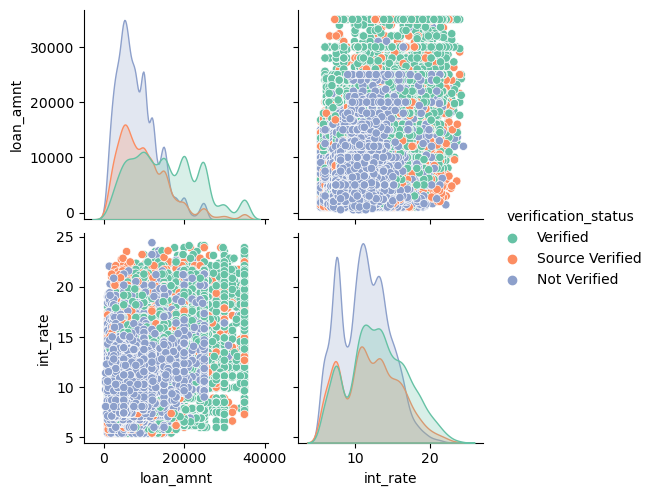

In [163]:
#Pair plots for Loan Amount, Interest Rate and Verific
sns.pairplot(loan[ ['loan_amnt','int_rate','verification_status'] ], hue='verification_status', palette='Set2')

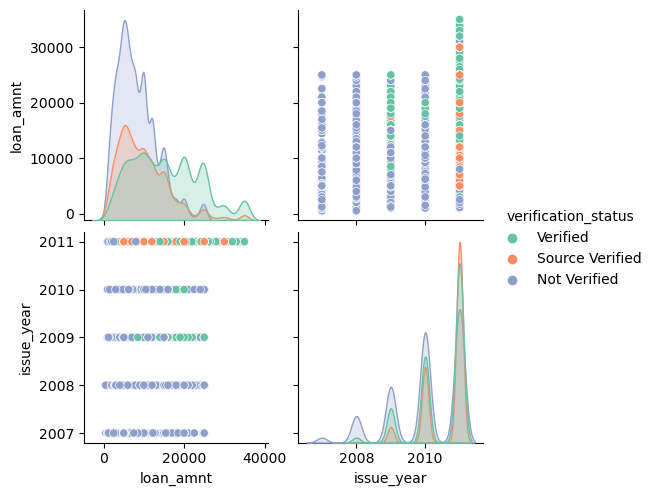

In [164]:
#Pair Plot for Loan Amount, Issue Year and Verification Status
sns.pairplot(loan[ ['loan_amnt','issue_year','verification_status'] ], hue='verification_status', palette='Set2')
plt.show()

In [165]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'pub_rec_bankruptcies', 'annual_inc_cat', 'issue_year', 'issue_month'],
      dtype='object')

In [166]:
# Convert the Loan_Status to Ordered categorical variable for further analysis

loan['loan_status'] = loan['loan_status'].replace( 'Fully Paid', 0 )
loan['loan_status'] = loan['loan_status'].replace( 'Charged Off', 1 )
loan.reset_index(inplace=True)


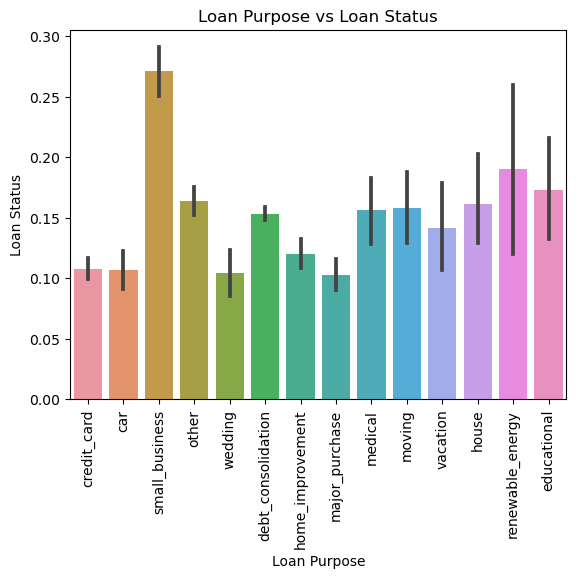

In [167]:
#Plot the relationship between Loan Purpose and Loan Status
sns.barplot(x='purpose', y='loan_status', data=loan)
plt.title('Loan Purpose vs Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Status')
plt.xticks(rotation=90)
plt.show()

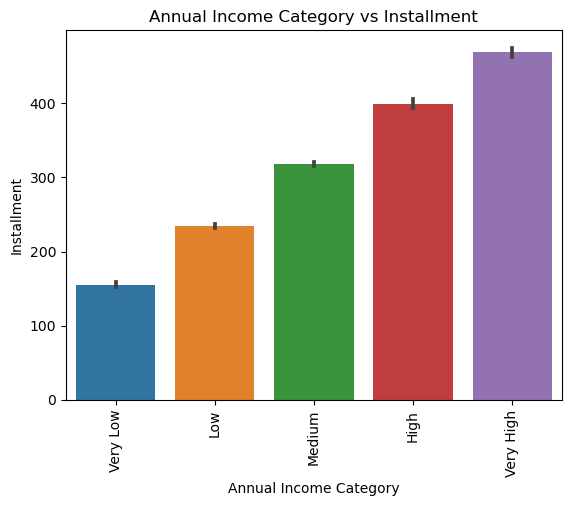

In [168]:
# Installment vs Annual Income Category
sns.barplot(x='annual_inc_cat', y='installment', data=loan)
plt.title('Annual Income Category vs Installment')
plt.xlabel('Annual Income Category')
plt.ylabel('Installment')
plt.xticks(rotation=90)
plt.show()

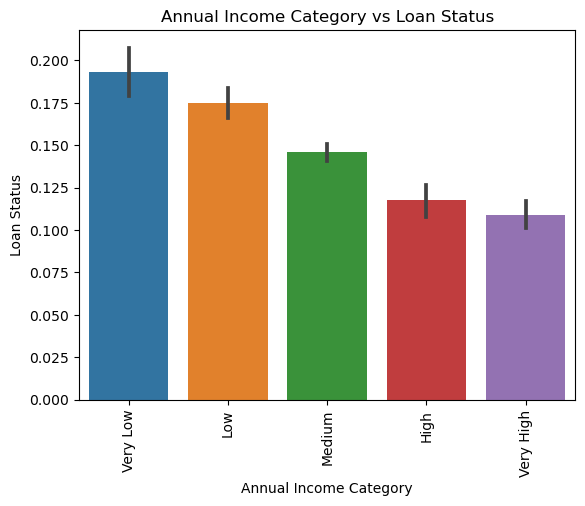

In [169]:
# Bar Plot to show Annual Income Category vs Loan Status
sns.barplot(x='annual_inc_cat', y='loan_status', data=loan)
plt.title('Annual Income Category vs Loan Status')
plt.xlabel('Annual Income Category')
plt.ylabel('Loan Status')
plt.xticks(rotation=90)
plt.show()

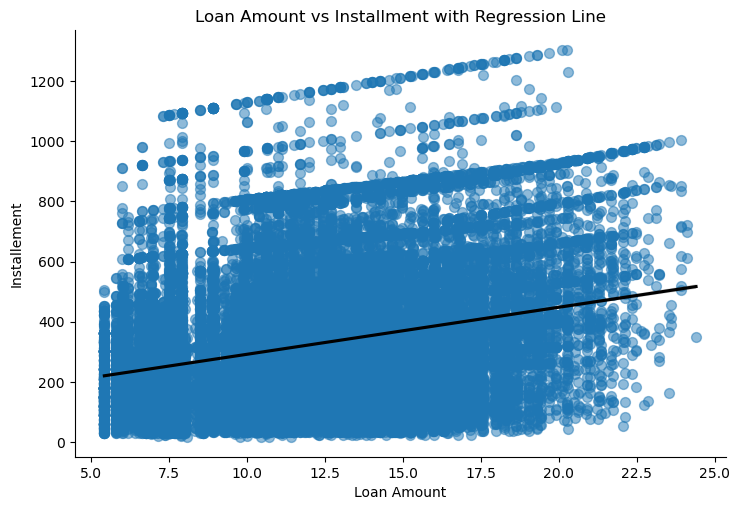

In [170]:
# Create a scatter plot with regression line using lmplot Loan Amount vs Installment 
sns.lmplot(x='int_rate', y='installment', data=loan, aspect=1.5, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "black"})
plt.title('Loan Amount vs Installment with Regression Line')
plt.xlabel('Loan Amount')
plt.ylabel('Installement')
plt.show()


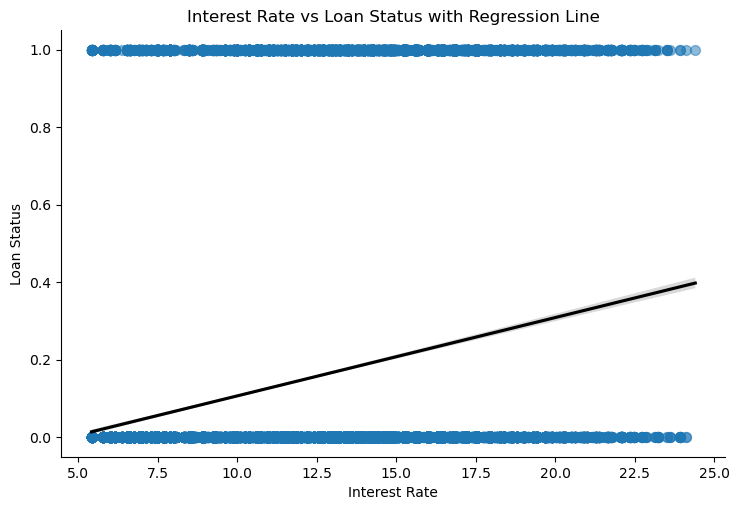

In [171]:
# Create a scatter plot with regression line using lmplot for Interest Rate vs Loan Status
sns.lmplot(x='int_rate', y='loan_status', data=loan, aspect=1.5, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "black"})
plt.title('Interest Rate vs Loan Status with Regression Line')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.show()

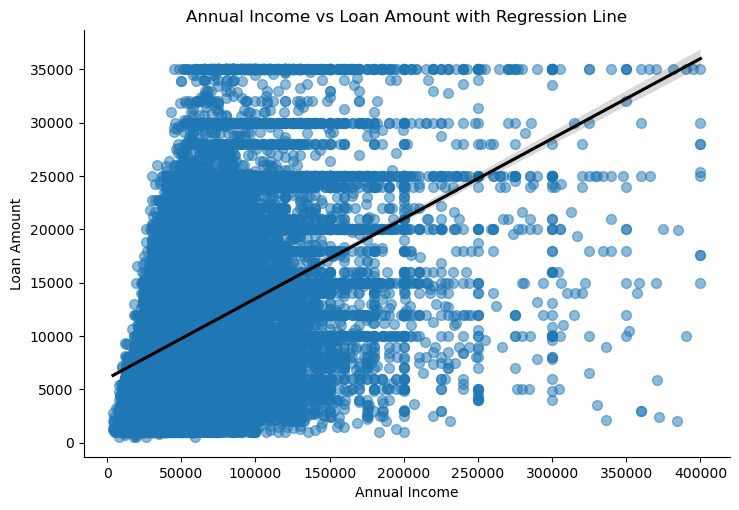

In [172]:
# Creation a scatter plot to show the relationship between Annual Income and Loan Amount
sns.lmplot(x='annual_inc', y='loan_amnt', data=loan, aspect=1.5, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "black"})
plt.title('Annual Income vs Loan Amount with Regression Line')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()
#plt.scatter(loan.annual_inc, loan.loan_amnt)

In [173]:
loan.columns

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'pub_rec_bankruptcies', 'annual_inc_cat', 'issue_year', 'issue_month'],
      dtype='object')

In [174]:
#Create a numeric data set for correlation matrix creation
loan_numeric = loan[ ['loan_amnt', 'term','installment', 'int_rate', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'pub_rec_bankruptcies'] ]
corr_matrix = loan_numeric.corr()
print(corr_matrix)


                      loan_amnt      term  installment  int_rate  emp_length  \
loan_amnt              1.000000  0.347522     0.932145  0.301131    0.128722   
term                   0.347522  1.000000     0.091008  0.440158    0.097644   
installment            0.932145  0.091008     1.000000  0.277194    0.101533   
int_rate               0.301131  0.440158     0.277194  1.000000   -0.012505   
emp_length             0.128722  0.097644     0.101533 -0.012505    1.000000   
annual_inc             0.411757  0.069020     0.411373  0.078690    0.133583   
loan_status            0.059414  0.173492     0.026919  0.211290    0.024092   
dti                    0.064289  0.076357     0.054022  0.111537    0.045562   
pub_rec_bankruptcies  -0.035601  0.014182    -0.032900  0.083172    0.070747   

                      annual_inc  loan_status       dti  pub_rec_bankruptcies  
loan_amnt               0.411757     0.059414  0.064289             -0.035601  
term                    0.069020     0.

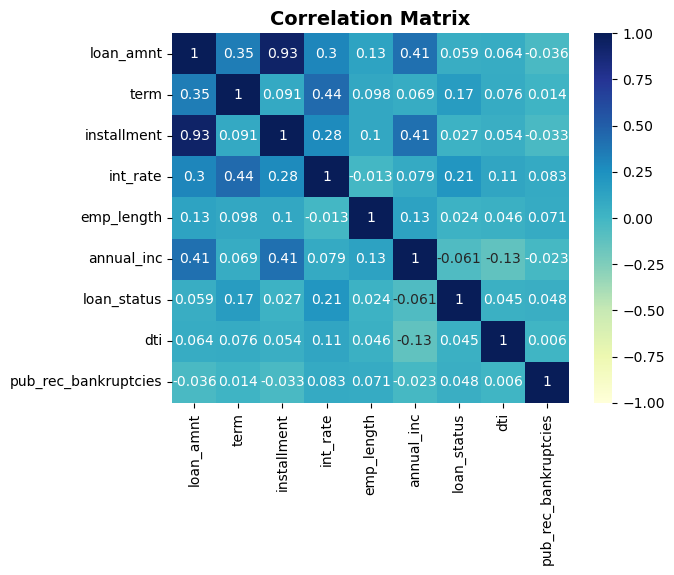

In [175]:
# Generate Heatmap for various continuous variables
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

In [291]:
import sys

In [295]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
